In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

from datetime import timedelta

print("numpy version  : ", np.__version__)
print("pandas version : ", pd.__version__)
print("xarray version : ", xr.__version__)

numpy version  :  1.23.5
pandas version :  2.0.0
xarray version :  2023.4.2


In [2]:
sns.set_style('white')
sns.set_context('paper', font_scale=3)
sns.set_palette('hls', 6)
sns.set_style('ticks')

In [3]:
dir_001 = "/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_scalar_annual/ts/annual/5yr"
dir_002 = "/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_historical/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_scalar_annual/ts/annual/5yr"
dir_003 = "/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_1pctCO2_C/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_scalar_annual/ts/annual/5yr"
dir_209 = "/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210706/CM4_piControl_c192_OM4p125_v7/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_scalar_annual/ts/annual/10yr"
dir_210 = "/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210706/CM4_piControl_c192_OM4p25_v7/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_scalar_annual/ts/annual/10yr"
dir_230 = "/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_piControl_c192_OM4p25_v8/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_scalar_annual/ts/annual/10yr"
dir_231 = "/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_historical_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_scalar_annual/ts/annual/10yr"
dir_232 = "/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_ssp585_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_scalar_annual/ts/annual/10yr"
dir_233 = "/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_historical_c192_OM4p125/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_scalar_annual/ts/annual/10yr"
dir_255 = "/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20230608/CM4_historical_c192_OM4p125/gfdl.ncrc5-intel22-prod-openmp/pp/ocean_scalar_annual/ts/annual/10yr"
dir_cm25 = "/net/smg/documents/OMDT/analysis_CM2p5/CM2.5_A_Control-1860_Y02/temp_global_ave"
dir_cm26 = "/net/smg/documents/OMDT/analysis_CM2p6/1860/ocean_scalars"

In [4]:
fname_001 = dir_001+"/ocean_scalar_annual.*.thetaoga.nc"
fname_002 = dir_002+"/ocean_scalar_annual.*.thetaoga.nc"
fname_003 = dir_003+"/ocean_scalar_annual.*.thetaoga.nc"
fname_209 = dir_209+"/ocean_scalar_annual.*.thetaoga.nc"
fname_210 = dir_210+"/ocean_scalar_annual.*.thetaoga.nc"
fname_230 = dir_230+"/ocean_scalar_annual.*.thetaoga.nc"
fname_231 = dir_231+"/ocean_scalar_annual.*.thetaoga.nc"
fname_232 = dir_232+"/ocean_scalar_annual.*.thetaoga.nc"
fname_233 = dir_233+"/ocean_scalar_annual.*.thetaoga.nc"
fname_255 = dir_255+"/ocean_scalar_annual.*.thetaoga.nc"
fname_cm25 = dir_cm25+"/ocean_scalar.*.temp_global_ave.nc"
fname_cm26 = dir_cm26+"/ocean_scalar.*.temp_global_ave.nc"

In [5]:
ds_001 = xr.open_mfdataset(fname_001, use_cftime = True)
ds_002 = xr.open_mfdataset(fname_002, use_cftime = True)
ds_003 = xr.open_mfdataset(fname_003, use_cftime = True)
ds_209 = xr.open_mfdataset(fname_209, use_cftime = True)
ds_210 = xr.open_mfdataset(fname_210, use_cftime = True)
ds_230 = xr.open_mfdataset(fname_230, use_cftime = True)
ds_231 = xr.open_mfdataset(fname_231, use_cftime = True)
ds_232 = xr.open_mfdataset(fname_232, use_cftime = True)
ds_233 = xr.open_mfdataset(fname_233, use_cftime = True)
ds_255 = xr.open_mfdataset(fname_255, use_cftime = True)
ds_cm25 = xr.open_mfdataset(fname_cm25, use_cftime = True)
ds_cm26 = xr.open_mfdataset(fname_cm26, use_cftime = True)

In [6]:
thetaoga_001 = ds_001['thetaoga']
thetaoga_002 = ds_002['thetaoga']
thetaoga_003 = ds_003['thetaoga']
thetaoga_209 = ds_209['thetaoga']
thetaoga_210 = ds_210['thetaoga']
thetaoga_230 = ds_230['thetaoga']
thetaoga_231 = ds_231['thetaoga']
thetaoga_232 = ds_232['thetaoga']
thetaoga_233 = ds_233['thetaoga']
thetaoga_255 = ds_255['thetaoga']
thetaoga_cm25 = ds_cm25['temp_global_ave'][:,0]
thetaoga_cm26 = ds_cm26['temp_global_ave'][:,0]

# simpler time axis to use just the year 

thetaoga_001['year'] = thetaoga_001['time'].dt.year + 1749
thetaoga_001         = thetaoga_001.swap_dims({'time':'year'})

thetaoga_002['year'] = thetaoga_002['time'].dt.year 
thetaoga_002         = thetaoga_002.swap_dims({'time':'year'})

thetaoga_003['year'] = thetaoga_003['time'].dt.year 
thetaoga_003         = thetaoga_003.swap_dims({'time':'year'})

thetaoga_209['year'] = thetaoga_209['time'].dt.year + 1749
thetaoga_209         = thetaoga_209.swap_dims({'time':'year'})

thetaoga_210['year'] = thetaoga_210['time'].dt.year + 1749
thetaoga_210         = thetaoga_210.swap_dims({'time':'year'})

thetaoga_230['year'] = thetaoga_230['time'].dt.year + 1749
thetaoga_230         = thetaoga_230.swap_dims({'time':'year'})

thetaoga_231['year'] = thetaoga_231['time'].dt.year
thetaoga_231         = thetaoga_231.swap_dims({'time':'year'})

thetaoga_232['year'] = thetaoga_232['time'].dt.year
thetaoga_232         = thetaoga_232.swap_dims({'time':'year'})

thetaoga_233['year'] = thetaoga_233['time'].dt.year
thetaoga_233         = thetaoga_233.swap_dims({'time':'year'})

thetaoga_255['year'] = thetaoga_255['time'].dt.year
thetaoga_255         = thetaoga_255.swap_dims({'time':'year'})


thetaoga_231_232 = xr.concat([thetaoga_231,thetaoga_232],dim="year")
thetaoga_210_230 = xr.concat([thetaoga_210[0:100],thetaoga_230],dim="year")
thetaoga_002_003 = xr.concat([thetaoga_002,thetaoga_003],dim="year")

thetaoga_cm25['year'] = thetaoga_cm25['time'].dt.year + 1749
thetaoga_cm25         = thetaoga_cm25.swap_dims({'time':'year'})

thetaoga_cm26['year'] = thetaoga_cm26['time'].dt.year + 1749
thetaoga_cm26         = thetaoga_cm26.swap_dims({'time':'year'})


In [7]:
thetaoga_cm25

<xarray.DataArray 'temp_global_ave' (year: 160)>
dask.array<getitem, shape=(160,), dtype=float32, chunksize=(20,), chunktype=numpy.ndarray>
Coordinates:
    scalar_axis  float64 0.0
    time         (year) object 0001-07-02 12:00:00 ... 0160-07-02 00:00:00
  * year         (year) int64 1750 1751 1752 1753 1754 ... 1906 1907 1908 1909
Attributes:
    long_name:      Global mean temp in liquid seawater
    units:          deg_C
    valid_range:    [ -10. 1000.]
    standard_name:  sea_water_potential_temperature
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT

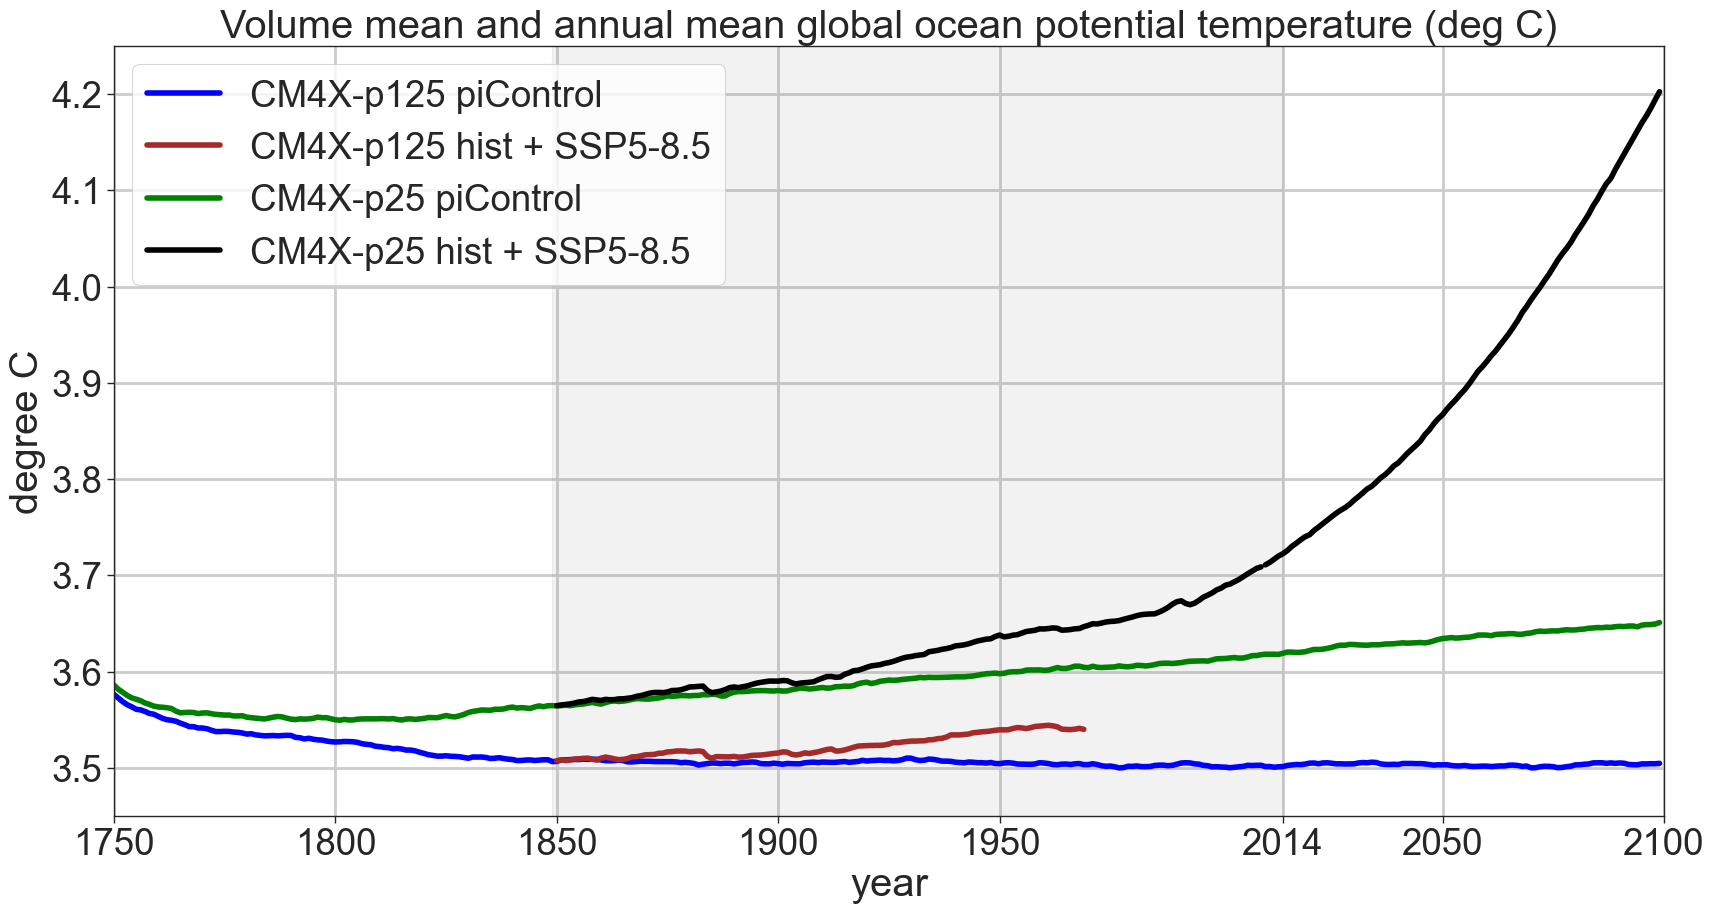

In [8]:
fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(20,10))

thetaoga_209.plot.line(ax=axis, label='CM4X-p125 piControl',linestyle='solid', color='blue', linewidth=4) 
#thetaoga_233.plot.line(ax=axis, label='CM4X-p125 hist + SSP5-8.5', linestyle='solid', color='brown', linewidth=1) 
thetaoga_255.plot.line(ax=axis, label='CM4X-p125 hist + SSP5-8.5', linestyle='solid', color='brown', linewidth=4) 

thetaoga_210_230.plot.line(ax=axis, label='CM4X-p25 piControl',linestyle='solid', color='green', linewidth=4) 
#thetaoga_piC_p25.plot.line(ax=axis,linestyle='solid', color='green', linewidth=4) 
thetaoga_231.plot.line(ax=axis, linestyle='solid', color='black', linewidth=4) 
thetaoga_232.plot.line(ax=axis, label='CM4X-p25 hist + SSP5-8.5',linestyle='solid', color='black', linewidth=4) 

#thetaoga_001.plot.line(ax=axis, label='CM4.0 piControl',linestyle='solid', color='red', linewidth=4) 
#thetaoga_002_003.plot.line(ax=axis, label='CM4.0 hist + SSP5-8.5', linestyle='solid', color='cyan', linewidth=4) 

#thetaoga_cm25.plot.line(ax=axis, label='CM2.5 piControl', linestyle='solid', color='cyan', linewidth=4) 
#thetaoga_cm26.plot.line(ax=axis, label='CM2.6 piControl', linestyle='solid', color='red', linewidth=4) 


axis.legend(loc='upper left')
axis.set_ylim([3.45,4.25])
axis.set_xlim(1750,2100)
axis.set_ylabel('degree C')
axis.set_xlabel('year')

axis.fill_between(thetaoga_209['year'].values, 0, thetaoga_209['year'].values,
                  where=((thetaoga_209['year'] >= 1850) & (thetaoga_209['year'] <= 2014)),
                  interpolate=True, color='gray', alpha=0.1)


axis.grid(linewidth=2)
plt.xticks(ticks=[1750, 1800, 1850, 1900, 1950, 2014, 2050, 2100])
plt.vlines(x=-5.5e4,ymin=3.5,ymax=3.6, color= 'purple', linestyle='solid')
plt.vlines(x=3.7e3,ymin=3.5,ymax=3.8, color= 'purple', linestyle='solid')
axis.set_title('Volume mean and annual mean global ocean potential temperature (deg C)')
fig.savefig('thetaoga_CM4X.png', bbox_inches='tight', dpi=200)

